In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [9]:
# URL for covid case data
covid_cases = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

# Covid deaths dataframe
df_cases = pd.read_csv(covid_cases)
df_cases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [11]:
# Remove irrelevant columns
df_cases.drop(columns=["UID", "iso2", "iso3", "code3", "FIPS", "Country_Region", "Lat", "Long_"], inplace=True)

In [13]:
# Rename columns
df_cases.rename(columns={'Admin2':'county',
                         'Province_State':'state',
                         'Combined_Key':'county_state'},
                inplace=True)

In [15]:
# Melt df_cases to df_cases_melted
df_cases_melted = pd.melt(df_cases, id_vars=['county', 'state', 'county_state'], var_name='date', value_name='cases')

In [19]:
# Convert data type for date to a datetime object
df_cases_melted.date = pd.to_datetime(df_cases_melted.date)
print(df_cases_melted.dtypes)

county                  object
state                   object
county_state            object
date            datetime64[ns]
cases                    int64
dtype: object


In [21]:
# URL for covid deaths data:  
covid_deaths = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
# Covid deaths dataframe
df_deaths = pd.read_csv(covid_deaths)
df_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261


In [23]:
# Remove irrelevant columns
df_deaths.drop(columns=["UID", "iso2", "iso3", "code3", "FIPS", "Country_Region", "Lat", "Long_", "Population"], inplace=True)

In [27]:
# Rename columns 
df_deaths.rename(columns={'Admin2':'county',
                 'Province_State':'state', 
                 'Combined_Key':'county_state'},
                 inplace=True)

In [29]:
# Melt df_deaths to df_deaths_melted
df_deaths_melted = pd.melt(df_deaths, id_vars=['county', 'state', 'county_state'], var_name='date', value_name='deaths')
df_deaths_melted.head()

,county,state,county_state,date,deaths
0,Autauga,Alabama,"Autauga, Alabama, US",1/22/20,0
1,Baldwin,Alabama,"Baldwin, Alabama, US",1/22/20,0
2,Barbour,Alabama,"Barbour, Alabama, US",1/22/20,0
3,Bibb,Alabama,"Bibb, Alabama, US",1/22/20,0
4,Blount,Alabama,"Blount, Alabama, US",1/22/20,0


In [35]:
# Convert data type for date to a datetime object
df_deaths_melted.date = pd.to_datetime(df_cases_melted.date)
df_deaths_melted.dtypes

county                  object
state                   object
county_state            object
date            datetime64[ns]
deaths                   int64
dtype: object

In [43]:
# Merge the melted dataframes for cases and deaths and store it in df_merged

df_merged = pd.merge(df_cases_melted, df_deaths_melted)
df_merged.head()

,county,state,county_state,date,cases,deaths
0,Autauga,Alabama,"Autauga, Alabama, US",2020-01-22,0,0
1,Baldwin,Alabama,"Baldwin, Alabama, US",2020-01-22,0,0
2,Barbour,Alabama,"Barbour, Alabama, US",2020-01-22,0,0
3,Bibb,Alabama,"Bibb, Alabama, US",2020-01-22,0,0
4,Blount,Alabama,"Blount, Alabama, US",2020-01-22,0,0


In [45]:
# Calculate the number of days into the outbreak for each record

df_merged["us_outbreak"] = df_merged.date - df_merged.date.min()

# Outputs the number of days since the outbreak (Day 0)
print(df_merged[["date", "us_outbreak"]].iloc[-1])

date           2023-03-09 00:00:00
us_outbreak     1142 days 00:00:00
Name: 3819905, dtype: object


In [47]:
# Aggregate the dataframe
df = df_merged.groupby(["us_outbreak", "date"], 
                       as_index=False)["cases"].sum()
df.head()

,us_outbreak,date,cases
0,0 days,2020-01-22,1
1,1 days,2020-01-23,1
2,2 days,2020-01-24,2
3,3 days,2020-01-25,2
4,4 days,2020-01-26,5


In [51]:
# New cases column
df["new_cases"] = df.cases.diff()
df.tail()

,us_outbreak,date,cases,new_cases
1138,1138 days,2023-03-05,103646975,-3862.0
1139,1139 days,2023-03-06,103655539,8564.0
1140,1140 days,2023-03-07,103690910,35371.0
1141,1141 days,2023-03-08,103755771,64861.0
1142,1142 days,2023-03-09,103802702,46931.0


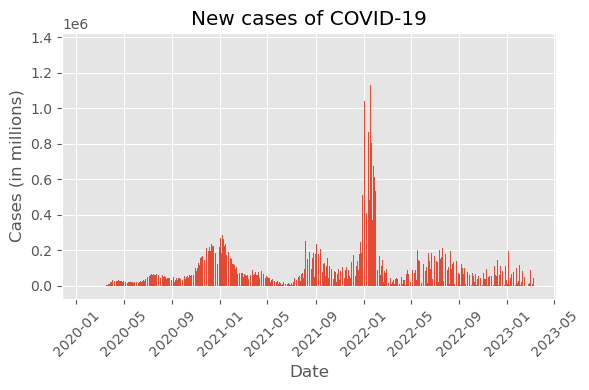

In [53]:
# Visualize new cases over time

plt.figure(figsize=(6,4)) # include figsize keyword argument
plt.bar(df.date,df.new_cases)
plt.xticks(rotation=45) # include rotation keyword argument
plt.xlabel("Date")
plt.ylabel("Cases (in millions)")
plt.title("New cases of COVID-19")
plt.tight_layout()
plt.show()

In [65]:
# Compute the average number of new cases that were reported in each recorded year 

usa2021 = df[(df.date >= "01/01/2021") & (df.date <= "12/31/2021")]
print("2021:",usa2021.new_cases.mean())

usa2022 = df[(df.date >= "01/01/2022") & (df.date <= "12/31/2022")]
print("2022:",usa2022.new_cases.mean())

usa2023 = df[(df.date >= "01/01/2023") & (df.date <= "05/01/2023")]
print("2023:",usa2022.new_cases.mean())

2021: 95035.22465753424
2022: 125637.01369863014
2023: 125637.01369863014
